In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st

In [2]:
save_images = False
sep = ","
enc = "utf-8"
file = "cc_vary_t.csv"
df = pd.read_csv(file, sep=sep, header=0, encoding=enc)

In [3]:
t_params = [0.55, 0.6, 0.65, 0.7]
dfs = []
for t_param in t_params:
    tmp_df = df[df["T"] == t_param]
    dfs.append(tmp_df)

In [4]:
def plot_alg_box(dfs, k_params, feat="OOA", suffixes=["CC"], ylabel=None,
        print_latex=False, ylim=None, figsize=(12,8), yticks=None, float_format="%.2f"):
    col_names = []
    title = feat
    for i in range(len(suffixes)):
        suffix = suffixes[i]
        col_name = feat + "_" + suffix
        col_names.append(col_name)
    sub_dfs = []
    for i in range(len(dfs)):
        df = dfs[i]
        sub_df = df.loc[:, col_names]
        sub_df.columns = [str(k_params[i])]
        sub_dfs.append(sub_df)
    sub_df = pd.concat(sub_dfs, axis=1)
    if print_latex:
        df_desc = sub_df.describe(include="all")
        df_desc = df_desc.loc[["mean", "std", "25%", "50%", "75%"]]
        latex_str = df_desc.to_latex(escape=False, float_format=float_format)
        latex_str = latex_str.replace("_", "\_")
        latex_str = latex_str.replace("%", "\%")
        latex_str = latex_str.replace("|S|", "$|\mathcal{S}|$")
        
        print(latex_str)
    
    sub_df.plot(kind="box", figsize=figsize, rot=90, title=title, grid=True,
        showmeans=True, ylabel=ylabel, ylim=ylim, yticks=yticks)

\begin{tabular}{lrrrr}
\toprule
{} &  0.55 &  0.6 &  0.65 &  0.7 \\
\midrule
mean &  0.27 & 0.55 &  0.84 & 0.86 \\
std  &  0.13 & 0.12 &  0.06 & 0.06 \\
25\%  &  0.18 & 0.47 &  0.81 & 0.82 \\
50\%  &  0.23 & 0.55 &  0.85 & 0.86 \\
75\%  &  0.32 & 0.64 &  0.88 & 0.90 \\
\bottomrule
\end{tabular}



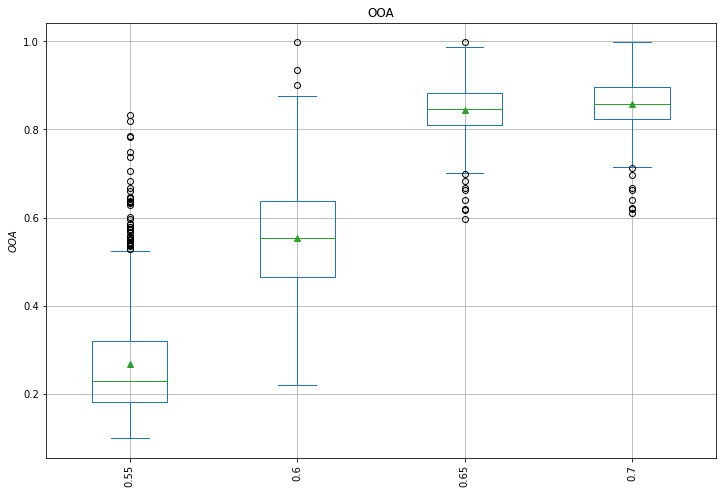

In [5]:
plot_alg_box(dfs=dfs, k_params=t_params, feat="OOA", ylabel=r"$OOA$", print_latex=True, suffixes=["CC"])
if save_images:
    plt.savefig("cc_vs_fh04_ooa.png", bbox_inches="tight")

\begin{tabular}{lrrrr}
\toprule
{} &  0.55 &    0.6 &   0.65 &    0.7 \\
\midrule
mean & 12.33 & 223.66 & 484.28 & 543.06 \\
std  & 11.21 & 157.73 & 283.20 & 308.66 \\
25\%  &  5.00 & 107.00 & 272.00 & 315.00 \\
50\%  & 10.00 & 187.00 & 429.00 & 486.00 \\
75\%  & 16.00 & 305.00 & 635.00 & 705.50 \\
\bottomrule
\end{tabular}



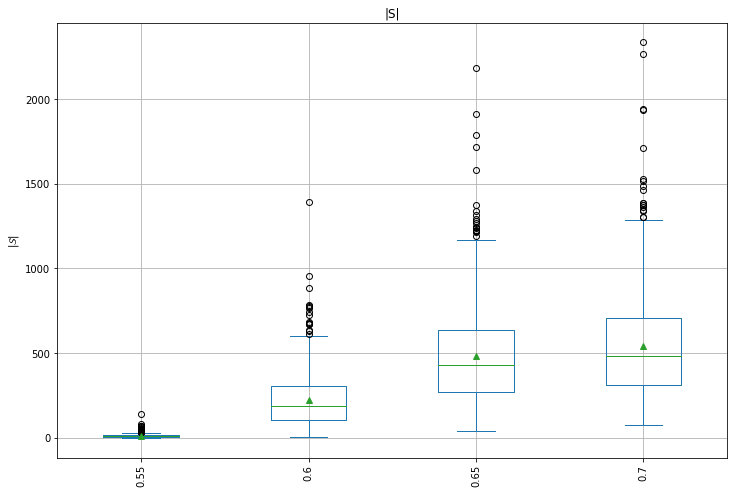

In [6]:
plot_alg_box(dfs=dfs, k_params=t_params, feat="|S|", ylabel=r"$|\mathcal{S}|$", print_latex=True, suffixes=["CC"])
if save_images:
    plt.savefig("cc_vs_fh04_sizes.png", bbox_inches="tight")

\begin{tabular}{lrrrr}
\toprule
{} &   0.55 &    0.6 &   0.65 &    0.7 \\
\midrule
mean & 0.0264 & 0.0040 & 0.0000 & 0.0000 \\
std  & 0.0635 & 0.0268 & 0.0002 & 0.0001 \\
25\%  & 0.0003 & 0.0001 & 0.0000 & 0.0000 \\
50\%  & 0.0028 & 0.0002 & 0.0000 & 0.0000 \\
75\%  & 0.0163 & 0.0009 & 0.0000 & 0.0000 \\
\bottomrule
\end{tabular}



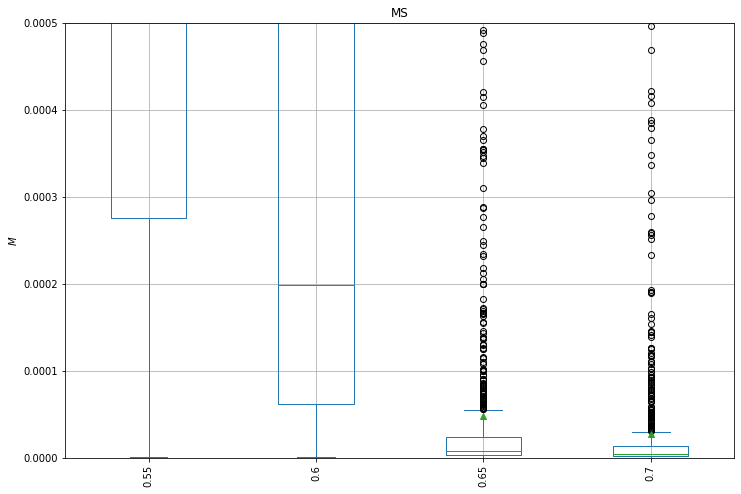

In [7]:
plot_alg_box(dfs=dfs, k_params=t_params, feat="MS", ylabel=r"$M$", print_latex=True,
    suffixes=["CC"], float_format="%.4f"
    , ylim=[0.000, 0.0005]
    )
if save_images:
    plt.savefig("cc_vs_fh04_ms.png", bbox_inches="tight")